<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos · PEC2</p>
<p style="margin: 0; text-align:right;">2020-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 2: Métodos no supervisados

A lo largo de esta práctica veremos como aplicar distintas técnicas no supervisadas
así como algunas de sus aplicaciones reales:

 - **Clustering con distintas estrategias**: k-means y regla del codo, basadas en densidad y jerárquicas.
 - **Optimización con reducción de dimensionalidad**: t-SNE.
 - **Aplicación**: identificación de puntos de interés turísticos.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Nombre y apellidos: Santiago Domínguez Collado</strong>
</div>

---

Para ello vamos a necesitar las siguientes librerías:

In [41]:
import random

import numpy as np
import pandas as pd
from sklearn import cluster      # Algoritmos de clustering.
from sklearn import datasets     # Crear datasets.
from sklearn import manifold     # Algoritmos de reduccion de dimensionalidad.

# Visualizacion.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. Métodos de *clustering* (4 puntos)

Este ejercicio trata de explorar distintas técnicas de agrupamiento ajustándolas a distintos conjuntos de datos.

El objetivo es doble: entender la influencia de los parámetros en su comportamiento, y conocer sus limitaciones en la búsqueda de estructuras de datos.

### Generación de los conjuntos de datos

In [42]:
X_blobs, y_blobs = datasets.make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.6, random_state=42)
X_moons, y_moons = datasets.make_moons(n_samples=1000, noise=.07, random_state=42)
X_circles, y_circles = datasets.make_circles(n_samples=1000, factor=.5, noise=.05, random_state=42)

Cada dataset tiene 2 variables: una variable *X* que contiene 2 features (columnas) y tantas filas como muestras. Y una variable *y* que alberga las etiquetas que identifican cada cluster.

A lo largo del ejercicio no se usará la variable *y* (sólo con el objetivo de visualizar). El objetivo es a través de los distintos modelos de *clustering* conseguir encontrar las estructuras descritas por las variables *y*.

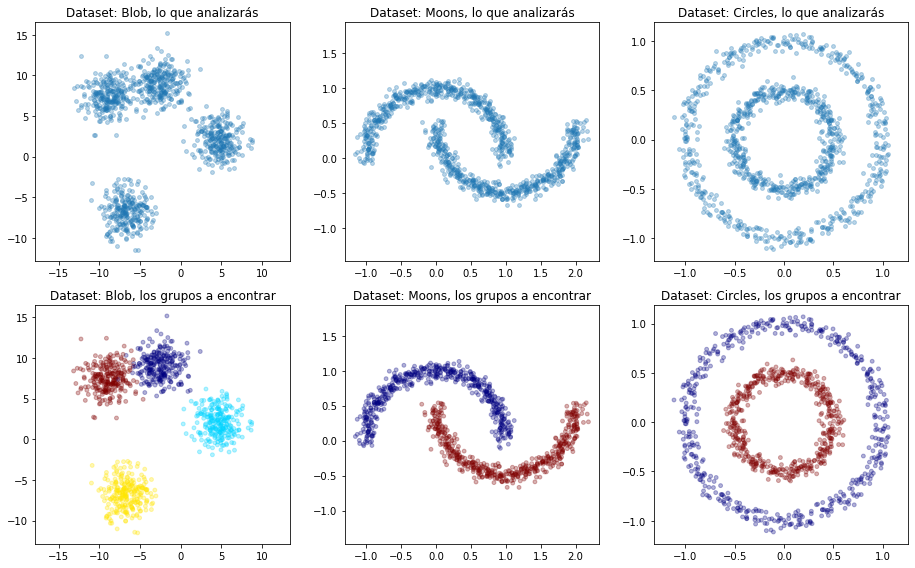

In [43]:
fig, axis = plt.subplots(2, 3, figsize=(13, 8))
for i, (X, y, ax, name) in enumerate(zip([X_blobs, X_moons, X_circles] * 2,
                                         [None] * 3 + [y_blobs, y_moons, y_circles],
                                         axis.reshape(-1),
                                         ['Blob', 'Moons', 'Circles'] * 2)):
    ax.set_title('Dataset: {}, '.format(name) + ('lo que analizarás' if i < 3 else 'los grupos a encontrar'))
    ax.scatter(X[:,0], X[:,1], s=15, c=y, alpha=.3, cmap='jet')
    ax.axis('equal')
plt.tight_layout()

### 1 a. K-means

En este apartado se pide probar el algoritmo *k-means* sobre los tres datasets presentados anteriormente ajustando con los parámetros adecuados y analizar sus resultados.

In [44]:
X, y = X_blobs, y_blobs

Para estimar el número de clusters a detectar por *k-means*. Una técnica para estimar $k$ es, como se explica en la teoría:
> Los criterios anteriores (minimización de distancias intra grupo o maximización de distancias inter grupo) pueden usarse para establecer un valor adecuado para el parámetro k. Valores k para los que ya no se consiguen mejoras significativas en la homogeneidad interna de los segmentos o la heterogeneidad entre segmentos distintos, deberían descartarse.

Lo que popularmente se conocer como *regla del codo*.

Primero es necesario calcular la suma de los errores cuadráticos ([*SSE*](https://bl.ocks.org/rpgove/0060ff3b656618e9136b)) que consiste en la suma de todos los errores (distancia de cada punto a su centroide asignado) al cuadrado.

$$SSE = \sum_{i=1}^{K} \sum_{x \in C_i} euclidean(x, c_i)^2$$

Donde $K$ es el número de clusters a buscar por *k-means*, $x \in C_i$ son los puntos que pertenecen a i-ésimo cluster, $c_i$ es el centroide del cluster $C_i$ (al que pertenece el punto $x$), y $euclidean$ es la [distancia euclídea](https://en.wikipedia.org/wiki/Euclidean_distance).

Este procedimiento realizado para cada posible valor $k$, resulta en una función monótona decreciente, donde el eje $x$ representa los distintos valores de $k$, y el eje $y$ el $SSE$. Intuitivamente se podrá observar un significativo descenso del error, que indicará el valor idóneo de $k$.

**Se pide realizar la representación gráfica de la regla del codo junto a su interpretación, utilizando la librería ```matplotlib``` y la implementación en scikit-learn de [*k-means*](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).**

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> cálculo y visualización de la regla del codo en el dataset Blobs.
</div>

In [45]:
from sklearn.cluster import KMeans

sse = [];
maxK=10
for k in range(1,maxK+1):# ejecutamos kmeans con k de 0 a 10
    kmeans=KMeans(n_clusters=k).fit(X_blobs)
    sse.append(kmeans.inertia_)  # este valor nos va a servir para elegir la k
sse

[69844.44038363648,
 34688.495955129394,
 10326.862522617077,
 4943.410788738879,
 4480.592459923941,
 4019.7728334017615,
 3571.3623306556656,
 3171.5943613248783,
 2896.8275560052075,
 2644.5465298701556]

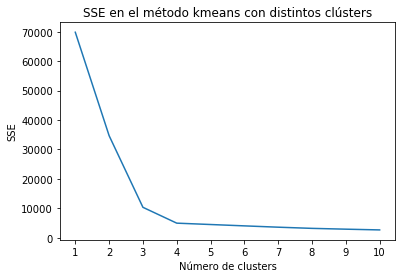

In [46]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Número de clusters")
plt.ylabel("SSE")
plt.title('SSE en el método kmeans con distintos clústers')
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué se interpreta en la gráfica? ¿Cómo podría mejorarse la elección de $k$?.  
</div>

A partir de 4 clusters la pendiente de la gráfica dismuniye drásticamente.

Siempre es recomendable realizar clustering para aquellos valores de K en los que se tenga duda. En este caso y viendo los datos esta claro que 4 es el valor que buscamos pero si no podríamos hacer el métodod con K=3,4 y 5.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> cálculo y visualización de los grupos en el dataset Blobs.
</div>

[Text(0.5, 1.0, 'Clustering del método Kmeans')]

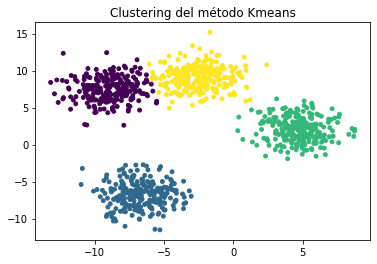

In [47]:
kmeans = KMeans(n_clusters=4).fit(X_blobs)
yh = kmeans.predict(X_blobs)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=yh, s=15)
plt.gca().set(title='Clustering del método Kmeans')

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué ha sucedido? Explica los motivos por los que crees que se ha producido ese resultado.  
</div>

El kmeans ha funcionado satisfactoriamente gracias al cálculo de la regla del codo. Los 4 grupos se distinguen perfectamente y no parece haber ningún resultado fuera de lo común.

In [48]:
X, y = X_moons, y_moons

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> cálculo y visualización de la regla del codo en el dataset Moons.
</div>

In [49]:
sse = [];
maxK=10
for k in range(1,maxK+1):
    kmeans=KMeans(n_clusters=k).fit(X_moons)
    sse.append(kmeans.inertia_)  
sse

[1003.4691966250364,
 407.8563101620519,
 275.1561781300028,
 177.66406681098618,
 133.2478524069371,
 93.05943503163881,
 74.68592425173324,
 56.57063988356117,
 46.932100545967174,
 38.606538728511524]

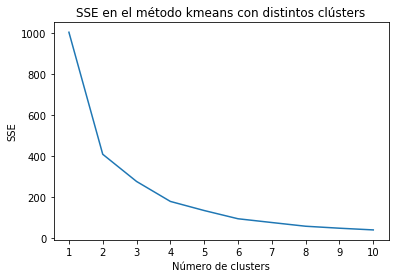

In [50]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Número de clusters")
plt.ylabel("SSE")
plt.title('SSE en el método kmeans con distintos clústers')
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué se interpreta en la gráfica? ¿Cómo podría mejorarse la elección de $k$?.  
</div>

A partir de 2 clusters la pendiente de la gráfica disminuye drásticamente.

De nuevo las mejoras que se pueden hacer en la elección de k para este caso son muy pocas. Existen otros métodos como el Gap Stadistic Method que se puede utilizar de forma paralela a la regla del codo para encontrar el valor de k.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> cálculo y visualización de los grupos en el dataset Moons.
</div>

[Text(0.5, 1.0, 'Clustering del método Kmeans')]

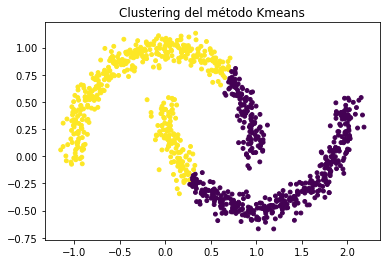

In [51]:
kmeans = KMeans(n_clusters=2).fit(X_moons)
yh = kmeans.predict(X_moons)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=yh, s=15)
plt.gca().set(title='Clustering del método Kmeans')

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué ha sucedido? Explica los motivos por los que crees que se ha producido ese resultado.  
</div>

El método Kmeans no sirve para casos como este en los que los aparentes grupos están tan distribuidos por el plano. La distancia euclídea no es una métrica válida para realizar agrupamiento en este caso.

In [52]:
X, y = X_circles, y_circles

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> cálculo y visualización de la regla del codo en el dataset Circles.
</div>

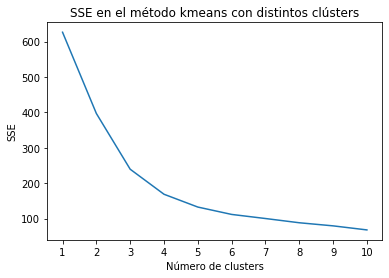

In [53]:
sse = [];
maxK=10
for k in range(1,maxK+1):
    kmeans=KMeans(n_clusters=k).fit(X_circles)
    sse.append(kmeans.inertia_)  
    
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Número de clusters")
plt.ylabel("SSE")
plt.title('SSE en el método kmeans con distintos clústers')
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué se interpreta en la gráfica? ¿Cómo podría mejorarse la elección de $k$?.  
</div>

La gráfica no aloja mucha información, parece que el punto donde más varía la pendiente es con k=4 pero no se puede sacar nada concluyente con la regla del codo.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> cálculo y visualización de los grupos en el dataset Circles.
</div>

[Text(0.5, 1.0, 'Clustering del método Kmeans')]

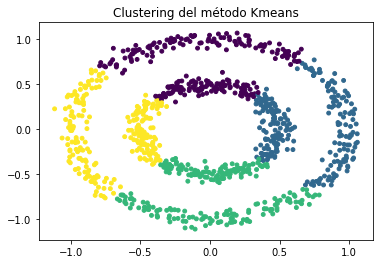

In [54]:
kmeans = KMeans(n_clusters=4).fit(X_circles)
yh = kmeans.predict(X_circles)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=yh, s=15)
plt.gca().set(title='Clustering del método Kmeans')

Es evidente que son 2 clústers no 4, vamos a probar método de Shilhouette score para obtener el valor correcto de k.

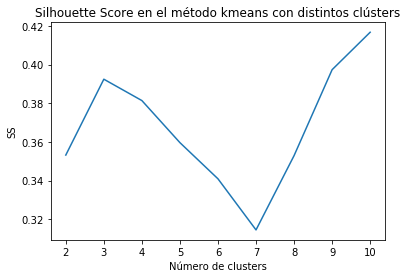

In [105]:
from sklearn.metrics import silhouette_score

ss = [];
maxK=10 # este es el mismo código que el de la regla del codo
for k in range(2,maxK+1):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit_predict(X_circles)
    ss.append(silhouette_score(X_circles, kmeans.labels_, metric='euclidean'))  # pero cambia en esta línea
    
plt.plot(range(2, 11), ss)
plt.xticks(range(2, 11))
plt.xlabel("Número de clusters")
plt.ylabel("SS")
plt.title('Silhouette Score en el método kmeans con distintos clústers')
plt.show()

Este método tampoco ha servido, lo que buscabamos es un valor cercano a 1. Los valores cercanos a 0 indican superposición de los grupos. Optamos por usar el uno de los criterios para determinar k según la teoría: probar otro valor a ver si funciona mejor.

[Text(0.5, 1.0, 'Clustering del método Kmeans')]

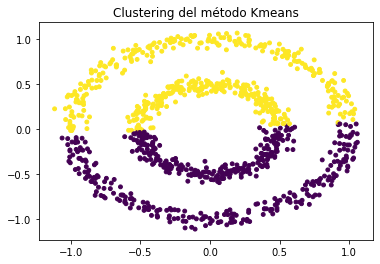

In [55]:
kmeans = KMeans(n_clusters=2).fit(X_circles)
yh = kmeans.predict(X_circles)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=yh, s=15)
plt.gca().set(title='Clustering del método Kmeans')

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué ha sucedido? Explica los motivos por los que crees que se ha producido ese resultado.  
</div>

Con 2 tampoco hemos tenido éxito. No probamos más porque al tener un set de datos bidimensional nos podemos fiar de nuestro ojo para afirmar que el número ideal de k es 2, pero no lo podemos calcular porque tanto el Silhouette Score como la Regla del Codo precompilan el kmeans para sus cálculos.

Y en este caso el método Kmeans en incapaz de realizar un buen agrupamiento con estos datos. Esto ocurre porque independientemente de donde estén los centroides, no hay un punto donde todos los puntos del círculo exterior estén más cerca de un centroide que de otro, lo mismo ocurre para el círculo interior.

### 1 b. Algoritmos basados en densidad: DBScan

En este apartado se pide aplicar clustering por densidad como [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN) a los datasets anteriores para detectar los grupos subyacentes.

In [56]:
X, y = X_blobs, y_blobs

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> prueba la implementación de <a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html">DBSCAN en scikit-learn</a> jugando con los parámetros <i>eps</i> y <i>min_samples</i> para encontrar los grupos (y <i>outliers</i>) del dataset Blobs.
</div>

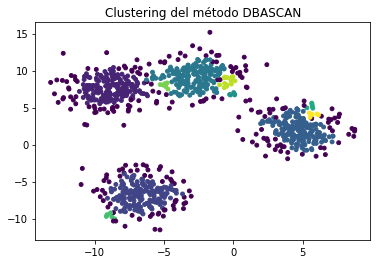

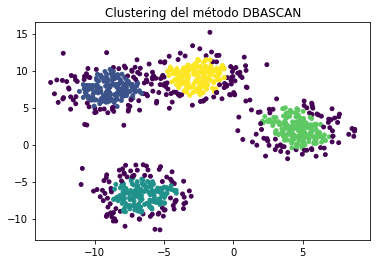

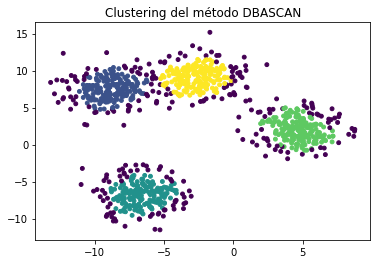

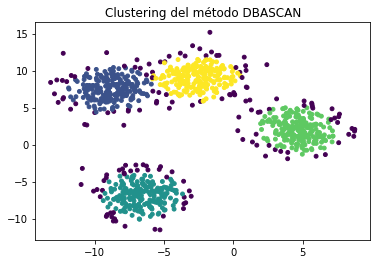

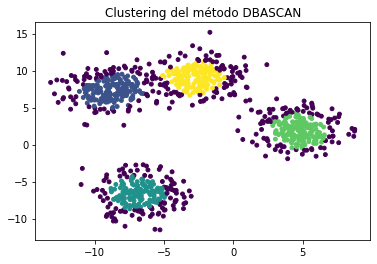

In [57]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN().fit_predict(X_blobs)
dbscan1 = DBSCAN(eps=0.6, min_samples=10).fit_predict(X_blobs) # probamos a reducir eps
dbscan2 = DBSCAN(eps=0.8, min_samples=15).fit_predict(X_blobs) # probamos a ampliar ambos parámetros
dbscan3 = DBSCAN(eps=1.18, min_samples=30).fit_predict(X_blobs) # probamos a ampliar ambos parámetros
dbscan4 = DBSCAN(eps=1.18, min_samples=50).fit_predict(X_blobs) # ampliamos el minimo para que no se formen pequeños grupos

modelos_dbscan=[dbscan,dbscan1,dbscan2,dbscan3,dbscan4]

for model in modelos_dbscan:
    plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=model, s=15)
    plt.gca().set(title='Clustering del método DBASCAN')
    plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué ha sucedido? Explica los motivos por los que crees que se ha producido ese resultado.  
</div>

Como se puede obvservar por más que se modfique la distancia máxima entre los datos del mismo grupo o el mínimo de datos para formar un grupo, el método no termina de funcionar bien. 

Esto ocurre porque los datos más dispersos junto con la métrica de la densidad hacen que el método DBSCAN detecte un quinto grupo en el que están todos los datos que no encajan por densidad con los otros grupos.


In [58]:
X, y = X_moons, y_moons

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> prueba la implementación de DBScan jugando con los parámetros <i>eps</i> y <i>min_samples</i> para encontrar los grupos (y <i>outliers</i>) del dataset Moons.
</div>

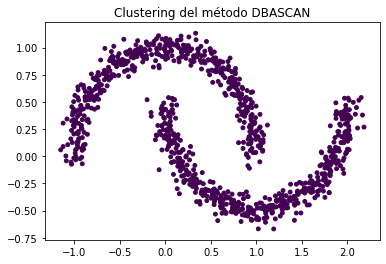

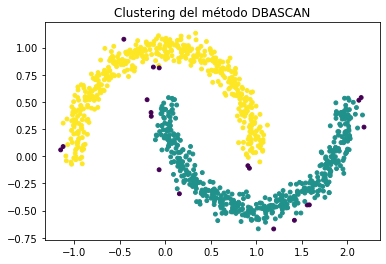

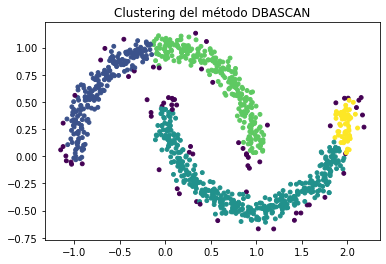

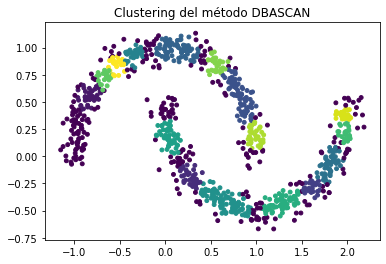

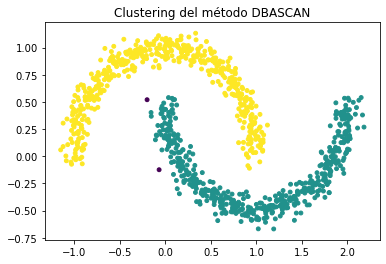

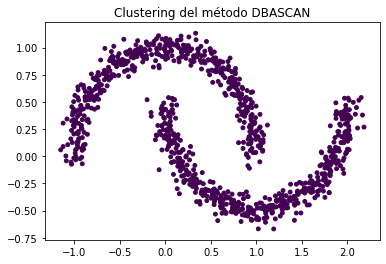

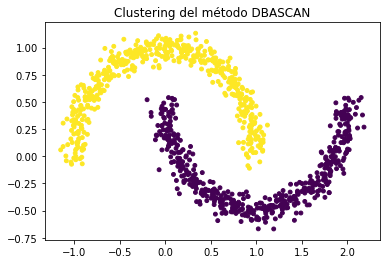

In [59]:
dbscan = DBSCAN().fit_predict(X_moons)
dbscan1 = DBSCAN(eps=0.1, min_samples=10).fit_predict(X_moons) # reducimos eps y ampliamos min
dbscan2 = DBSCAN(eps=0.1, min_samples=20).fit_predict(X_moons) # ampliamos min 
dbscan3 = DBSCAN(eps=0.1, min_samples=25).fit_predict(X_moons) # ampliamos min buscando eliminar los puntos del 3er grupo
dbscan4 = DBSCAN(eps=0.15, min_samples=20).fit_predict(X_moons) # volvemos a 20 en min y ampliamos eps
dbscan5 = DBSCAN(eps=0.25, min_samples=20).fit_predict(X_moons) # ampliamos drásticamente el eps para ver como reacciona 
dbscan6 = DBSCAN(eps=0.2, min_samples=20).fit_predict(X_moons) # lo dejamos en el término medio

modelos_dbscan=[dbscan,dbscan1,dbscan2,dbscan3,dbscan4,dbscan5,dbscan6]

for model in modelos_dbscan:
    plt.scatter(X_moons[:, 0], X_moons[:, 1], c=model, s=15)
    plt.gca().set(title='Clustering del método DBASCAN')
    plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué ha sucedido? Explica los motivos por los que crees que se ha producido ese resultado.  
</div>

El método DBSCAN ha funcionado, ha sido necesario reducir la eps y ampliar el número mínimo de datos para formar un grupo porque en ciertas zonas donde la densidad de datos era menor se generaba otro grupo.

In [60]:
X, y = X_circles, y_circles

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> prueba la implementación de DBScan jugando con los parámetros <i>eps</i> y <i>min_samples</i> para encontrar los grupos (y <i>outliers</i>) del dataset Circles.
</div>

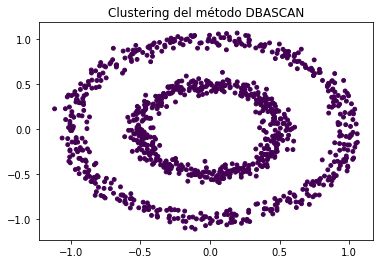

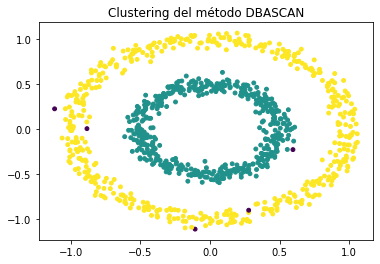

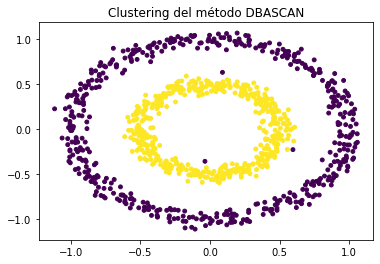

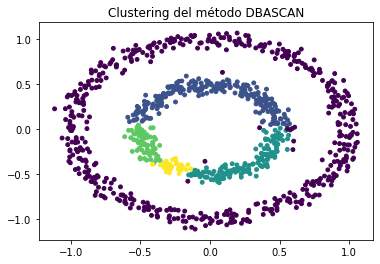

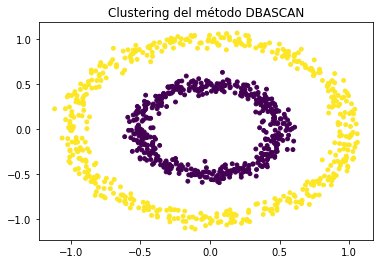

In [61]:
dbscan = DBSCAN().fit_predict(X_circles)
dbscan1 = DBSCAN(eps=0.1, min_samples=10).fit_predict(X_circles) # reducimos eps y ampliamos min
dbscan2 = DBSCAN(eps=0.1, min_samples=20).fit_predict(X_circles) # ampliamos min
dbscan3 = DBSCAN(eps=0.1, min_samples=25).fit_predict(X_circles) # ampliamos min buscanod eliminar los puntos sueltos
dbscan4 = DBSCAN(eps=0.15, min_samples=20).fit_predict(X_circles) # reducimos min y ampliamos eps para agrupar con éxito


modelos_dbscan=[dbscan,dbscan1,dbscan2,dbscan3,dbscan4]

for model in modelos_dbscan:
    plt.scatter(X_circles[:, 0], X_circles[:, 1], c=model, s=15)
    plt.gca().set(title='Clustering del método DBASCAN')
    plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué ha sucedido? Explica los motivos por los que crees que se ha producido ese resultado.  
</div>

Al igual que en el caso anterior, el método DBSCAN ha sido un éxito. A pesar de que cada dataset tiene su dispersión de puntos particular, en este caso los mismos parámetros sirven para Circles y Moons.

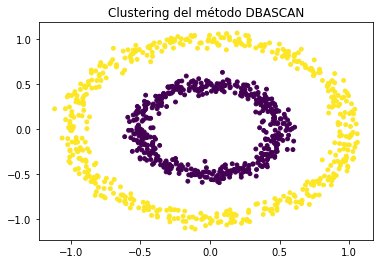

In [62]:
dbscan = DBSCAN(eps=0.2, min_samples=20).fit_predict(X_circles) # mismos parámetros que para X_moons
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=dbscan, s=15)
plt.gca().set(title='Clustering del método DBASCAN')
plt.show()

### 1 c. Algoritmos jerárquicos

En este apartado se pide visualizar mediante un [dendrograma](https://en.wikipedia.org/wiki/Dendrogram) la construcción progresiva de los grupos mediante un algoritmo jerárquico aglomerativo (estrategia *bottom-up*). Con ello se pretende encontrar un método gráfico para entender el comportamiento del algoritmo y encontrar los *clusters* deseados en cada dataset.

In [63]:
X, y = X_blobs, y_blobs

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage
def dendogramas(X): # esta vez creamos una función para los tres datasets
    links=['single','complete','average','weighted','centroid','median','ward'] # probamos todos los criterios de enlace que hay
    for l in links:
        dn = dendrogram(linkage(X, l)) # y ploteamos el dendograma
        plt.title("Dendograma basado en el criterio de enlace "+l)
        plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong><br>

prueba la implementación de <a href="https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html">clustering jerárquico de scipy</a> probando distintos <a href="https://en.wikipedia.org/wiki/Hierarchical_clustering#Linkage_criteria">criterios de enlace o <i>linkage</i></a> permitiendo identificar los clusters subyacentes (mostrando su resultado) y su dendrograma para el dataset Blobs.<br>
Puedes importar las librerías necesarias para ello.
</div>

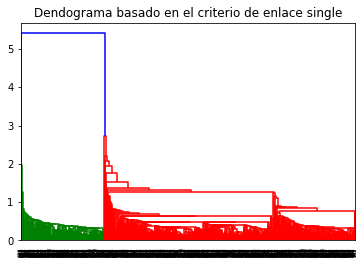

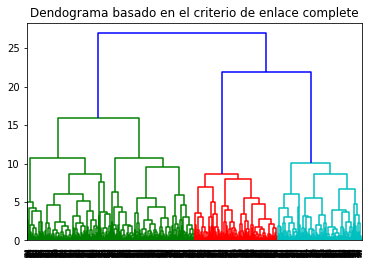

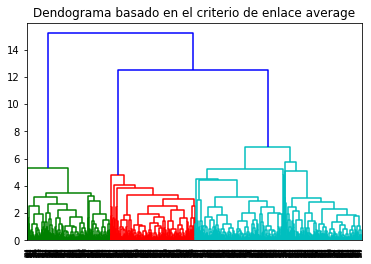

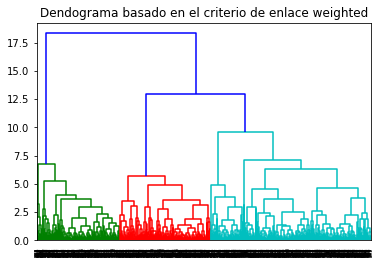

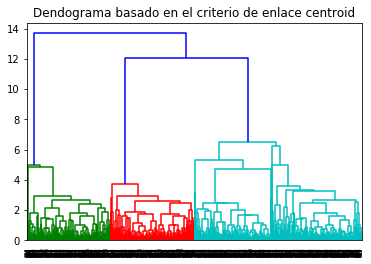

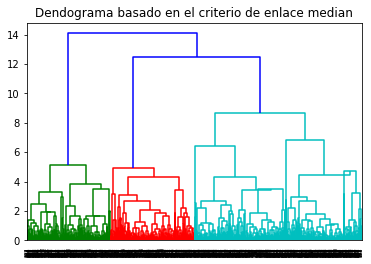

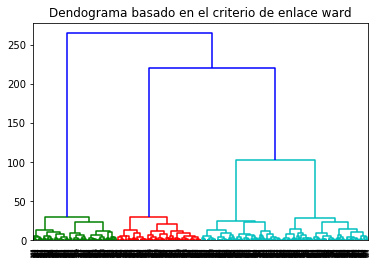

In [66]:
dendogramas(X_blobs)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Interpreta el dendrograma y comenta qué criterio de enlace se ha comportado mejor. ¿Por qué?
</div>

En los anteriores dendogramas ninguno parece haber rendido bien, recordemos que el dataset blobs tiene 4 grupos y en los dendogramas, independientemente del linkage, ninguno agrupa los datos en 4 grupos, 3 como mucho.

In [67]:
X, y = X_moons, y_moons

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong><br>

prueba la implementación de <a href="https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html">clustering jerárquico de scipy</a> probando distintos <a href="https://en.wikipedia.org/wiki/Hierarchical_clustering#Linkage_criteria">criterios de enlace o <i>linkage</i></a> permitiendo identificar los clusters subyacentes (mostrando su resultado) y su dendrograma para el dataset Moons.<br>
Puedes importar las librerías necesarias para ello.
</div>

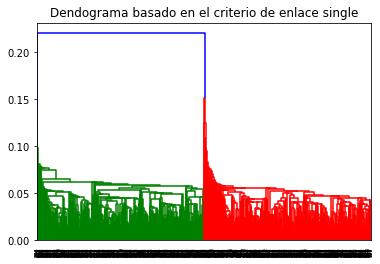

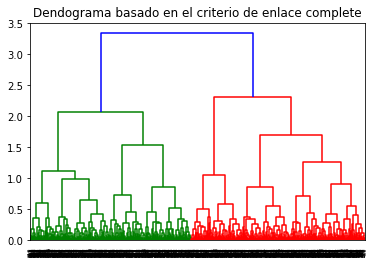

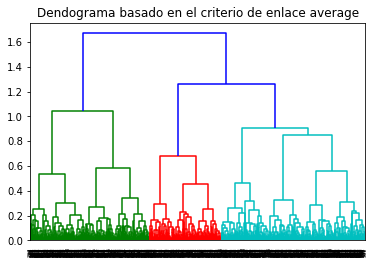

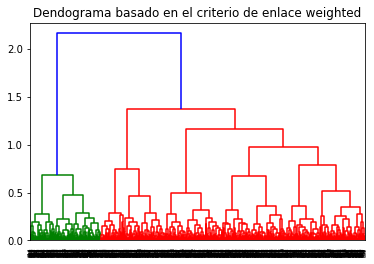

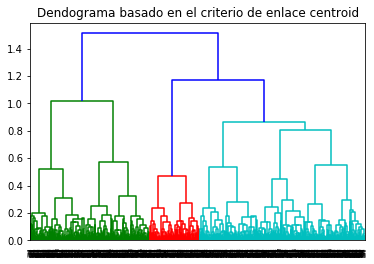

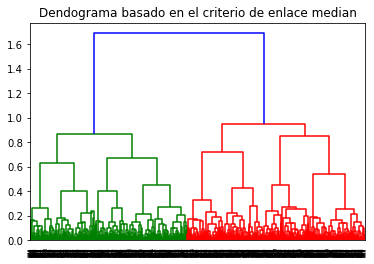

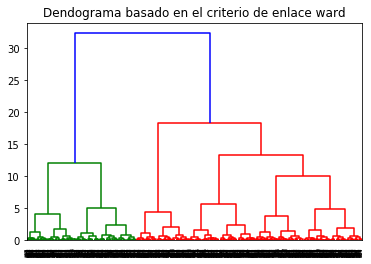

In [68]:
dendogramas(X_moons)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Interpreta el dendrograma y comenta qué criterio de enlace se ha comportado mejor. ¿Por qué?
</div>

El dendograma del enclace complete es el que mejor se ha comportado, agrupando de forma ascendente los datos del conjunto Moons en 2 conjuntos de igual tamaño. El enlace completo empareja en cada iteracción los clusters con menor distancia entre ellos, llegando a 1 único cluster, en la penúltima iteración los dos clusters a unir son los que podemos apreciar en otros métodos como el DBSCAN.

In [69]:
X, y = X_circles, y_circles

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong><br>

prueba la implementación de <a href="https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html">clustering jerárquico de scipy</a> probando distintos <a href="https://en.wikipedia.org/wiki/Hierarchical_clustering#Linkage_criteria">criterios de enlace o <i>linkage</i></a> permitiendo identificar los clusters subyacentes (mostrando su resultado) y su dendrograma para el dataset Circles.<br>
Puedes importar las librerías necesarias para ello.
</div>

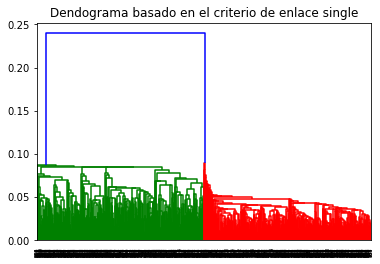

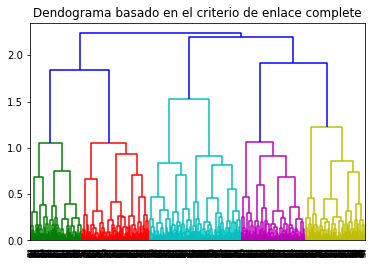

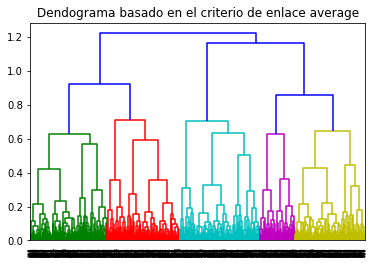

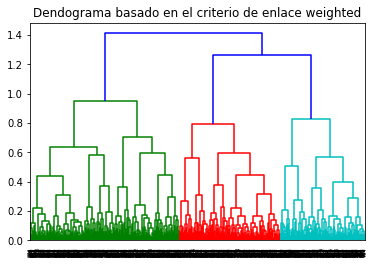

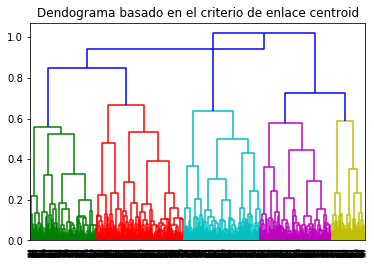

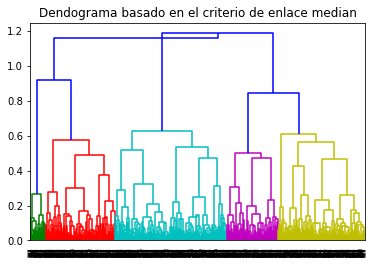

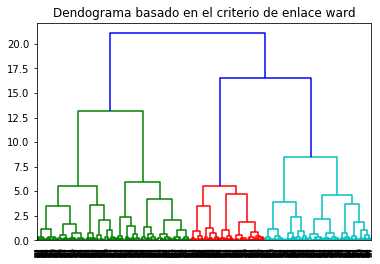

In [82]:
dendogramas(X_circles)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Interpreta el dendrograma y comenta qué criterio de enlace se ha comportado mejor. ¿Por qué?
</div>

Tanto el enlace complete como el average me parece que se han comportado bien. En el caso del conjunto de datos circulos, es normal que los métodos de agrupamiento no reconozcan bien los círculos y los dividan en varios grupos. Pero en estos dos veo similitud con las distintas ejecuciones del DBSCAN, creo que los 5 clústers que se ven en el dendograma pueden ser algo parecido a la penúltima ejecución de DBSCAN y que posteriormente convergen en los dos grupos que se buscan.

## 2. Aplicación de reducción de dimensionalidad para resolver un problema de optimización: t-SNE (2 puntos)

Como ya se ha visto, el algoritmo [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) ideado por [van der Maaten y Hinton](https://lvdmaaten.github.io/tsne/) difiere de PCA en que no trata de maximizar la varianza explicada. Intuitivamente, t-SNE trata de que la vecindad de un punto en baja dimensionalidad sea la misma que la original (mantenga las distancias). Partiendo de una localización aleatoria de cada punto, corrige su posición de forma iterativa tratando de minimizar la distancia a sus vecinos originales hasta converger.

Para ello, t-SNE dispone de diversos [parámetros](https://distill.pub/2016/misread-tsne/) que pueden modificar drásticamente el resultado. Por lo que se recomienda conocer su funcionamiento antes de aplicar la técnica.

Partiendo de las distancias entre las [provincias de la península ibérica](https://www.gifex.com/images/0X0/2009-12-02-11305/Provincias_de_Espana.jpg), presentes en el fichero de datos (en *pec2_2.p* un *DataFrame* de *pandas* en formato *pickle* o *pec2_2.csv* en formato *CSV*). Se pide calcular la matriz cuadrada que contenga la distancia de cada provincia contra las demás.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> la matriz debe tener tantas filas y columnas como provincias. Y cada celda debe contener la distancia entre las provincias de esa fila y columna.
</div>

In [71]:
df = pd.read_pickle('./pec2_2.p')
df

from                to        dist
0     A Coruña          A Coruña    0.000000
1     A Coruña          Albacete  724.856651
2     A Coruña  Alicante/Alacant  846.212163
3     A Coruña           Almería  840.615943
4     A Coruña          Asturias  203.994866
...        ...               ...         ...
2495     Ávila           Vizcaya  344.381605
2496     Ávila            Zamora  142.788128
2497     Ávila          Zaragoza  327.410049
2498     Ávila             Álava  305.027382
2499     Ávila             Ávila    0.000000

[2500 rows x 3 columns]

In [72]:
distancias = list(df.iloc[:,2])
matriz = x = np.reshape(distancias, (50, 50))# para hacer la matriz de distancias solo hay que poner la segunda columna 
matriz                                       # del dataframe como una matriz 50x50

array([[  0.        , 724.85665051, 846.21216296, ..., 616.47538848,
        473.05896065, 401.05319304],
       [724.85665051,   0.        , 133.16794528, ..., 302.15728323,
        436.33831708, 326.35771831],
       [846.21216296, 133.16794528,   0.        , ..., 343.2373174 ,
        506.48555481, 453.16351205],
       ...,
       [616.47538848, 302.15728323, 343.2373174 , ...,   0.        ,
        177.21288026, 327.41004899],
       [473.05896065, 436.33831708, 506.48555481, ..., 177.21288026,
          0.        , 305.02738162],
       [401.05319304, 326.35771831, 453.16351205, ..., 327.41004899,
        305.02738162,   0.        ]])

In [73]:
np.diagonal(matriz)# la diagonal de la matriz

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.49352980e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.49352980e-05, 0.00000000e+00,
       0.00000000e+00, 9.49352980e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.34258786e-04, 0.00000000e+00, 0.00000000e+00, 9.49352980e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

La diagonal de la matriz debería tener solo ceros pero vemos que hay unos pequeños valores en algunos casos, como no son relevantes no lo modificamos.

Una vez que se cuenta con la matriz de distancias, *t-SNE* tratará de mantener esas distancias entre los distintos puntos en baja dimensionalidad (en este caso 2 dimensiones). Emplazando los puntos en el plano mientras intenta mantener las distancias indicadas.

Dado que la entrada a [*t-SNE*](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) se le pasa la matriz de distancias, no es necesario que las calcule. Por ello le indicaremos que la métrica a emplear es "precalculada".

Como *t-SNE* es un algoritmo estocástico (dos ejecuciones consecutivas con los mismos datos pueden conducir a resultados diferentes). Se pide realizar el proceso de ajuste con *t-SNE* 100 veces y quedarse con la ejecución con menor error (ver el atributo [*kl_divergence*](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> jugar con los hiperparámetros de <i>t-SNE</i>, ejecutar 100 veces el ajuste de <i>t-SNE</i> y guardar el resultado de emplazamiento de provincias en el plano de la ejecución con menor error.
</div>

In [74]:
from sklearn.manifold import TSNE

best_model = TSNE(n_components=2,metric='precomputed').fit(matriz) #ejecutamos un modelo fuera del bucle para tener una mejor
best_kld = best_model.kl_divergence_                               # divergencia kl con la que comparar después

for i in range(99):
    model = TSNE(n_components=2,metric='precomputed').fit(matriz) # ejecutamos 99 modelos y nos quedamos con el mejor
    if model.kl_divergence_ < best_kld: 
        best_model = model
        
best_kld = best_model.kl_divergence_ # guardamos la mejor divergencia kl
print(best_kld)

0.097783662378788


Una vez que se tienen las posiciones de las provincias en el plano, visualizar el resultado y analizar si el emplazamiento de las provincias calculado por *t-SNE* calculado en base a las distancias se parece al real.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> visualizar en un <i>scatter</i> las provincias de la ejecución con menor error, junto con su nombre para poder analizarlo.
</div>

In [75]:
componentes_tsne = best_model.embedding_ # cogemos los datos
ciudades =[]
for c in range(0,2500,50):
    ciudades.append(df.iat[c,0]) #cogemos los nombres de las 50 ciudades


Mostramos la ditribución de las ciudades en un plot.

[Text(0.5, 1.0, 'Relación entre componentes t-SNE')]

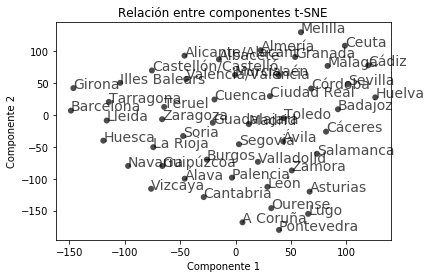

In [76]:
plt.scatter(componentes_tsne[:,0], componentes_tsne[:,1], #plot de la imagen
            c='black', edgecolor='none', alpha=0.7)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
for i in range(50):
    plt.annotate(ciudades[i], (componentes_tsne[i, 0] + 0.00005, componentes_tsne[i, 1] + 0.00005), fontsize=14, alpha=0.7)
plt.gca().set(title='Relación entre componentes t-SNE')

Repetimos el plot en una figura más grande.

[Text(0.5, 1.0, 'Relación entre componentes t-SNE')]

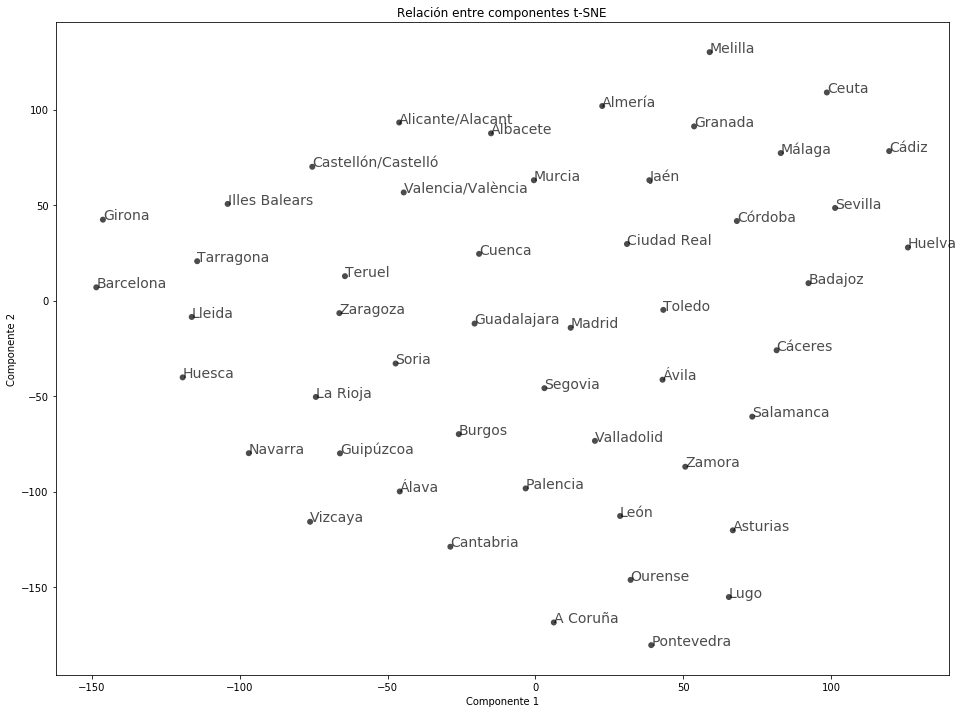

In [77]:
fig, ax = plt.subplots(figsize=(16, 12))
ax.scatter(componentes_tsne[:,0], componentes_tsne[:,1], #plot de la imagen
            c='black', edgecolor='none', alpha=0.7)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
for i in range(50):
    ax.annotate(ciudades[i], (componentes_tsne[i, 0] + 0.00005, componentes_tsne[i, 1] + 0.00005), fontsize=14, alpha=0.7)
plt.gca().set(title='Relación entre componentes t-SNE')

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿se parece a la distribución de provincias real? ¿por qué?
</div>

Aunque a primera vista pueda parecer que las provincias no tienen sentido,  en realidad el resultado es bastante bueno. En el dataset original solo se indica la distancia entre povincias, no la orientación. 

Si prestamos atención vemos que las provincias de Galicia están juntas, encima están las provincias que en el mapa de España darían al Mar Cantábrico, arriba del todo está Girona, y a las derecha todas la provincias del Levante, en le centro del todo Madrid...

Como conclusión, el método reduce la dismensionalidad manteniendo las distancias, el mapa no se parece al de España a primera vista porque está girado. 



## 3. Aplicación: identificación de puntos de interés turísticos (4 puntos)

En este ejercicio se busca automatizar la localización de lugares turísticos a través de los metadatos de las fotografías de flickr.

Para ello se provee junto a la PEC el dataset: ``barcelona.csv``. Ya que se pide encontrar los puntos de mayor interés turístico de esta ciudad.

**Opcional: si quieres hacerlo para otra región**

Pero si quieres hacerlo para otra parte del mundo, puedes descargarte el dataset completo [aquí](https://drive.google.com/file/d/0B-mRR4rjwHPONVFfX2VmTmxZcHM/view?usp=sharing) y descomprime para extraer el *CSV*.

Para seleccionar las coordenadas de la zona de interés puedes usar la opción *Export* manual de [OpenStreetMaps](https://www.openstreetmap.org/).

Por último, para filtrar los datos que se corresponden a la zona deseada puedes usar el programa *AWK* mediante la siguiente línea:

``awk -F"," 'NR == 1 {print $5","$6} (NR > 1 && $5 > 41.3560 && $5 < 41.4267 && $6 > 2.1300 && $6 < 2.2319) {print $5","$6}' photo_metadata.csv``

``$5`` hace referencia a la latitud, y ``$6`` a la longitud. Sustituye los valores mínimo y máximo para obtener los datos de localización referentes a tu área de interés.

In [83]:
geo_df = pd.read_csv('barcelona.csv', header=0)
geo_df.sample(5)

latitude  longitude
17197  41.386468   2.172203
12665  41.387515   2.168362
14701  41.379384   2.180571
19116  41.414186   2.151200
511    41.381107   2.178211

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> siempre que tratamos un problema real, es necesario entender los datos a tratar. Visualiza las localizaciones de las fotografías mediante un scatter plot. Prueba distintos parámetros de tamaño (<i>size</i>) <i>s</i>, y opacidad <i>alpha</i> hasta conseguir un resultado fácil de interpretar. 
</div>

[Text(0.5, 1.0, 'Ubicación de fotografías en barcelona')]

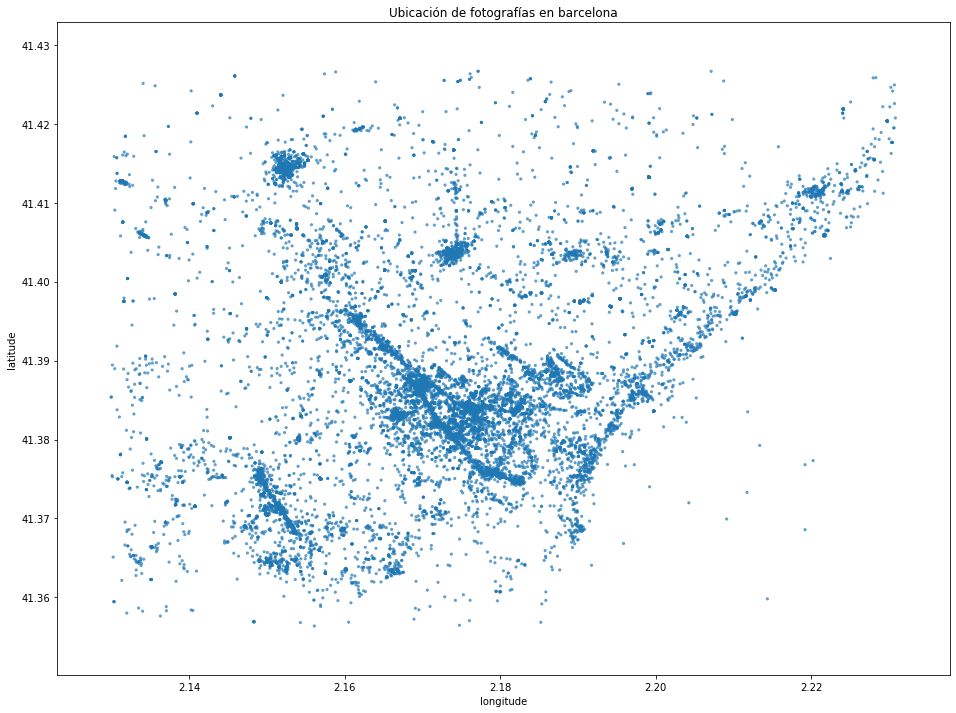

In [84]:
plt.subplots(figsize=(16, 12))
plt.scatter(geo_df.iloc[:,1],geo_df.iloc[:,0], edgecolor='none', alpha=0.7, s=10,
            cmap=plt.cm.get_cmap('Spectral'))
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.gca().set(title='Ubicación de fotografías en barcelona')


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> tras haber probado los algoritmos de agrupamiento en el ejercicio 1. ¿Qué algoritmo crees que sería más adecuado tras visualizar los datos? ¿Por qué?
</div>

Pienso que el KMeans es el que mejor resultado puede dar, en mi opinión la distancia euclídea es un buen criterio a seguir para definir los grupos en este caso. Aún así puede que alguna de sus variates menos sensibles a outliers pueda desarrollar un mejor rendimiento.

En un principio pensé en DBSCAN para estos problemas pero veo demasiada diversidad en cuanto a la densidad de los puntos como para que pueda funcionar de manera óptima.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> para prototipar el modelado primero se recomienda elegir un subconjunto de los datos que sea representativo. Selecciona una muestra del DataFrame original y visualiza como en el punto anterior para comprobar su similitud. 
</div>

Me he decidido por un muestreo aleatorio del 25%. Esta técnica es muy sencilla de implementar y dado que tenemos la posibilidad de visualizar los datos de forma clara podremos comprobar si nos es válida.

In [92]:
n=int(len(geo_df)*0.25)
sample_df = geo_df.sample(n)

[Text(0.5, 1.0, 'Muestreo de la ubicación de fotografías en barcelona')]

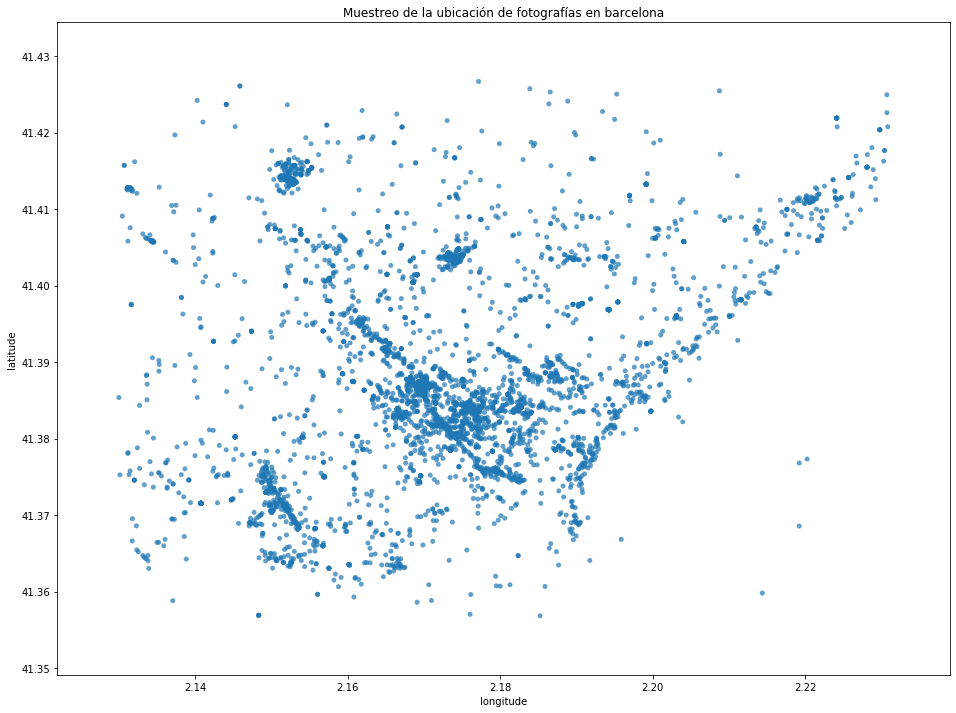

In [93]:
plt.subplots(figsize=(16, 12))
plt.scatter(sample_df.iloc[:,1],sample_df.iloc[:,0], edgecolor='none', alpha=0.7, s=25,
            cmap=plt.cm.get_cmap('Spectral'))
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.gca().set(title='Muestreo de la ubicación de fotografías en barcelona')

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> ajusta el algoritmo de clustering elegido para encontrar los distintos grupos sobre el conjunto reducido, y visualiza el resultado coloreando cada punto en base al grupo al que pertenece. Como pista, alrededor de 20 clusters es un número razonable, y es posible darles un color distinto a cada uno con el <i>colormap: tab20</i>.
</div>

[Text(0.5, 1.0, 'Muestreo de la ubicación de fotografías en barcelona por el método KMeans')]

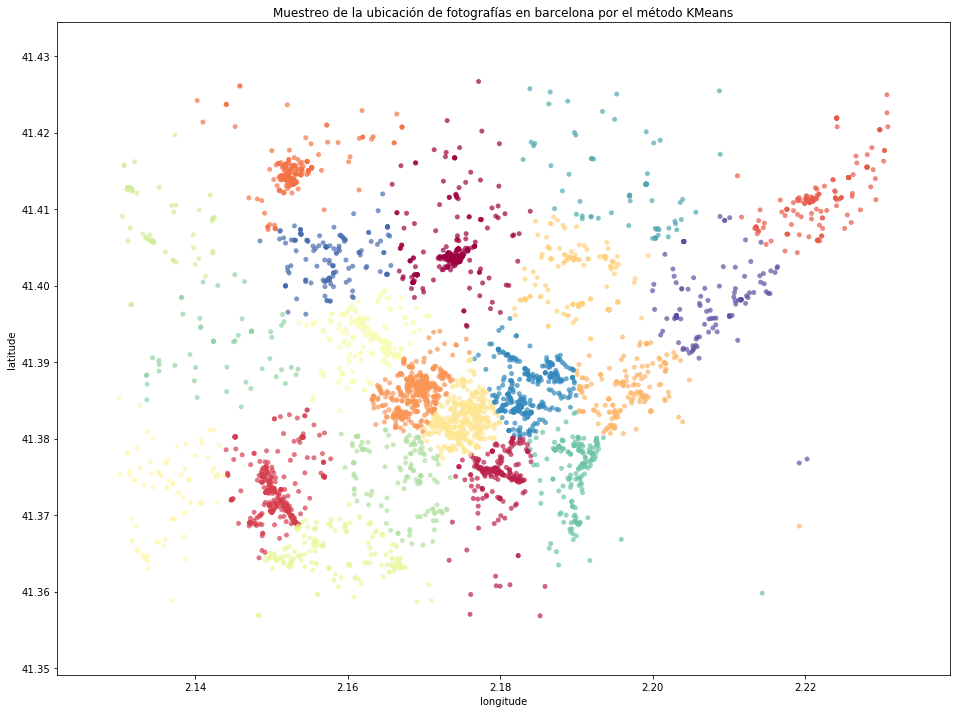

In [107]:
kmeans = KMeans(n_clusters=20).fit(sample_df)
yh = kmeans.predict(sample_df)

plt.subplots(figsize=(16, 12))
plt.scatter(sample_df.iloc[:,1],sample_df.iloc[:,0], edgecolor='none',c=yh, alpha=0.7, s=25,
            cmap=plt.cm.get_cmap('Spectral'))
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.gca().set(title='Muestreo de la ubicación de fotografías en barcelona por el método KMeans')

Los resultados me parecen excelentes, en el centro se distinguen las 3 zonas que correponden a los alrededores de la Sagrada Familia, la Casa Vicens Gaudi y la Pedrera Casa Mila. 

Antes de probar el modelo miré el mapa de Barcelona y me preocupaba que el método no las distinguiese como 3 zonas y las agrupara en una sola por estar las 3 tan cerca el mapa de Barcelona.

Antes de pasar al siguiente apartado quiero probar variaciones del Kmeans, elegiría uno de esos modelos como definitivo si:

    1. Conservase los 3 grupos del centro de la ciudad ya mencionados.
    2. El método sea menos sensible a outliners que el KMeans.

Pruebo el KMediods.

[Text(0.5, 1.0, 'Muestreo de la ubicación de fotografías en barcelona KMedoids')]

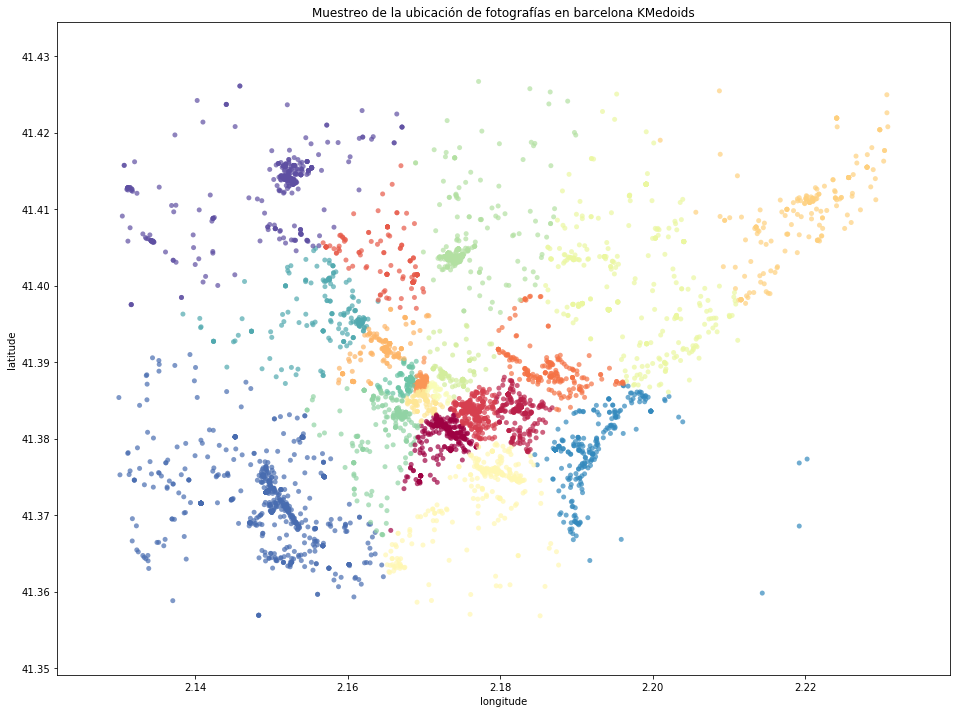

In [112]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=20).fit(sample_df)
yh = kmedoids.predict(sample_df)

plt.subplots(figsize=(16, 12))
plt.scatter(sample_df.iloc[:,1],sample_df.iloc[:,0], edgecolor='none',c=yh, alpha=0.7, s=25,
            cmap=plt.cm.get_cmap('Spectral'))
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.gca().set(title='Muestreo de la ubicación de fotografías en barcelona KMedoids')

Aunque el resultado ha sido bueno, a mi criterio prefiero el resultado del KMeans por la distribución de los grupos en la zona centro de Barcelona. Quizás este sea incluso mejor, pero no he estado nunca en la ciudad y el anterior mapa me cuadra mejor con los elementos más famosos que conozco.

Pruebo KMedians.

[Text(0.5, 1.0, 'Muestreo de la ubicación de fotografías en barcelona con KMedians')]

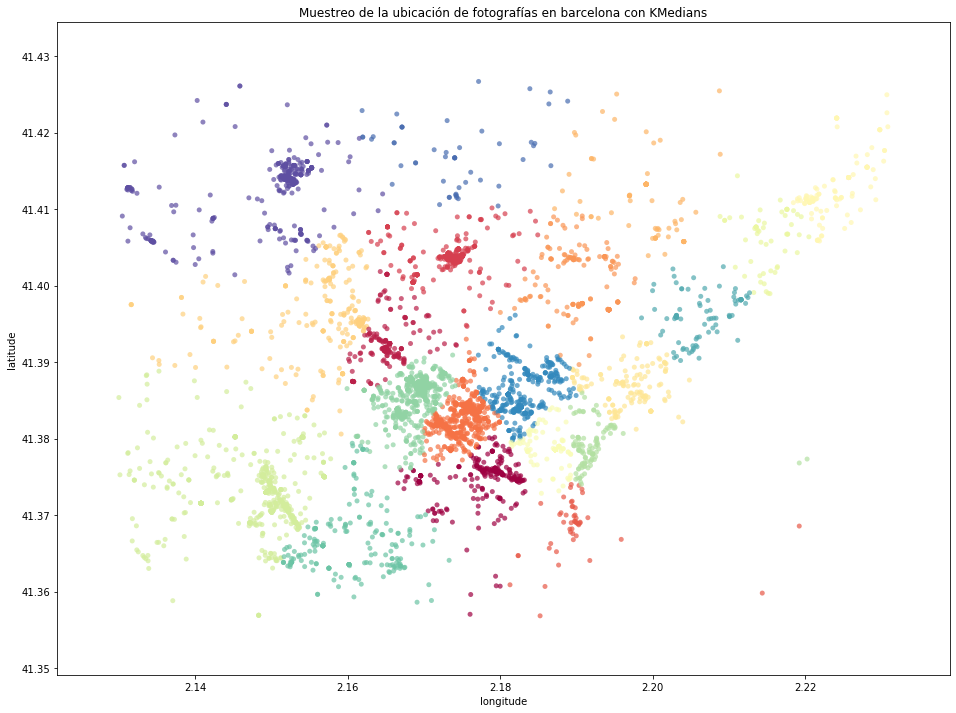

In [113]:
from sklearn_extensions.fuzzy_kmeans import KMedians
kmedians = KMedians(k=20)
X=np.array([sample_df.iloc[:,0],sample_df.iloc[:,1]])
yh = kmedians.fit(X.T).labels_

plt.subplots(figsize=(16, 12))
plt.scatter(sample_df.iloc[:,1],sample_df.iloc[:,0], edgecolor='none',c=yh, alpha=0.7, s=25,
            cmap=plt.cm.get_cmap('Spectral'))
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.gca().set(title='Muestreo de la ubicación de fotografías en barcelona con KMedians')

Este resultado me parece el ideal, conserva la distribución de las zonas del centro y divide la costa en 5, dato que se corresponde con las 4 playas que aparecen en Google Maps y con el puerto de la ciudad. 

Se puede apreciar el mejor rendimiento frente a ouliners en que no asigna un grupo para los pocos datos sueltos del lado izquierdo del mapa, simplemente los asigna al grupo más cercano. Me parece mejor opción que considerar el barrio "La Bordeta" como una de las 20 zonas donde más fotos se hace la gente en Barcelona.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> si has usado un método de <i>clustering</i> que permite la detección de <i>outliers</i>. Representa sólo los puntos que no ha considerado <i>outliers</i>, es decir, los que pertenecen a algún <i>cluster</i>.
</div>

No he utilizado ningún método de clustering para este ejercicio porque no he encontrado ninguno en la teoría que lo haga. No obstante el método KMedians muestra un buen rendimiento en este caso, siendo menos senible a otliers que el KMeans.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> interpreta cual es el lugar que representa cada <i>cluster</i> (si encuentras una asociación lógica).
</div>


Estas son las zonas que reconozco a partir del agrupamiento del Kmedians.

* Casa Vicens Gaudí: grupo verde en el centro.
* La Pedrera-Casa Milà: grupo Naranja en el centro.
* Basílica de la Sagrada Familia: grupo azul en el centro.
* Barrio Gótico y Museu Picasso de Barcelona: grupo amarillo debajo de la Sagrada Familia.
* El Raval: grupo rojo vino debajo de la Pedrera
* Fuente Mágica de Montjuic: grupo verde más oscuro de abajo.
* Plaza España: grupo verde claro encima de la Fuente Mágica de Montjuic.
* Parc d'atraccions Tibidabo y alrededores:  grupo morado arriba a la izquierda.
* Bellesguard Gaudí, CosmoCaixa y alrededores: grupo naranja debajo del morado.
* Jardines del Turó del Putxet y alrededores: grupo rojo vino encima de Casa Vicens Gaudí.
* Platja de Sant Sebastià: grupo naranja abajo del todo.
* Playa de la Barceloneta: grupo verde encima de la anterior playa.
* Port Olímpic: grupo amarillo encima de la playa de la Barceloneta.
* Playa del Bogatell: grupo azul verdoso encima del puerto.
* Playa Mar Bella: grupo verde claro encima de la playa de Bogatell.
* Museo de Ciencias Naturales de Barcelona: grupo más al este del mapa.
* Zona de Parque del Laberinto de Horta y campus universitario: grupo azul más al norte del mapa.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>OPCIONAL Implementación:</strong> representa los puntos sin ruido sobre un mapa utilizando la librería <a href="https://pypi.org/project/smopy/">Smopy</a>. Para facilitar la interpretación, puedes representar cada cluster como el punto medio de todos los puntos que lo conforman.
</div>

Utilizamos la mediana en lugar de la media para representar los grupos.

In [202]:
from statistics import median

data_labels = yh
points = []
for i in range(20):
    latitudes=[]
    longitudes=[]
    for k in range(len(data_labels)):
        if data_labels[k]==i:# guardamos las latitudes y longitudes de cada grupo 
            latitudes.append(sample_df.iloc[k,0])
            longitudes.append(sample_df.iloc[k,1])
    points.append([median(latitudes),median(longitudes)])# y luego guardamos la mediana de estas


In [203]:
points = np.array(points)# lo pasamos a ndarray
points.shape

(20, 2)

In [218]:
points

array([[41.375214 ,  2.178726 ],
       [41.391723 ,  2.164993 ],
       [41.403611 ,  2.174316 ],
       [41.368998 ,  2.18954  ],
       [41.382167 ,  2.175099 ],
       [41.398252 ,  2.190782 ],
       [41.411739 ,  2.199153 ],
       [41.395312 ,  2.1588185],
       [41.386963 ,  2.1972115],
       [41.411586 ,  2.22398  ],
       [41.378547 ,  2.187223 ],
       [41.407092 ,  2.214667 ],
       [41.372984 ,  2.149318 ],
       [41.37895  ,  2.191171 ],
       [41.386339 ,  2.169144 ],
       [41.365985 ,  2.160807 ],
       [41.396095 ,  2.206122 ],
       [41.385784 ,  2.182459 ],
       [41.416833 ,  2.174048 ],
       [41.41383  ,  2.152333 ]])

In [204]:
marcos_plot = (min(points[:,0]),max(points[:,0]),min(points[:,1]),max(points[:,1]))# definimos los marcos de la foto para descargarla en https://www.openstreetmap.org/
marcos_plot

(41.365984999999995, 41.416833000000004, 2.149318, 2.22398)

In [216]:
barcelona = plt.imread('barcelona.png') # la cargamos

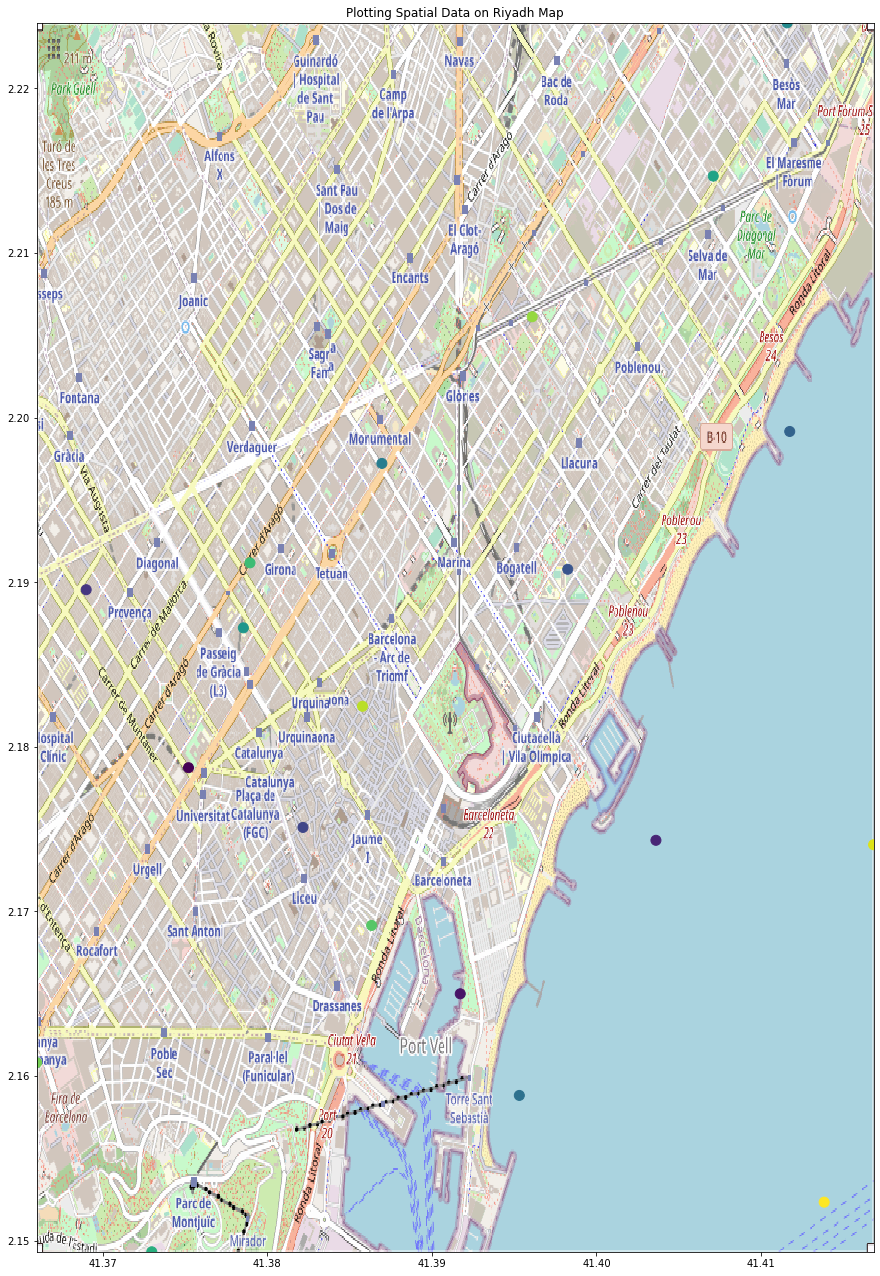

In [217]:
fig, ax = plt.subplots(figsize = (15, 200)) # hacemos el plot de las medianas sobre la foto
ax.scatter(points[:,0], points[:,1], zorder=1, alpha= 1, c=range(20), s=100)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(marcos_plot[0],marcos_plot[1])
ax.set_ylim(marcos_plot[2],marcos_plot[3])
ax.imshow(barcelona, zorder=0, extent = marcos_plot, aspect= 'equal')

La imagen no ha dado el resultado esperado porque no he sido capaz de utilizar la librería propuesta, a su vez la alternativa que he propuesto no dejaba exportar un mapa tan grande y he tenido que imporvisar un pantallazo lo mejor posible.